## Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/machine-learning-zoomcamp-homework/02-regression/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
y = df.fuel_efficiency_mpg.values
y

array([13.23172891, 13.68821744, 14.246341  , ..., 17.18658678,
       15.33155059, 14.8844674 ], shape=(9704,))

<Axes: ylabel='Count'>

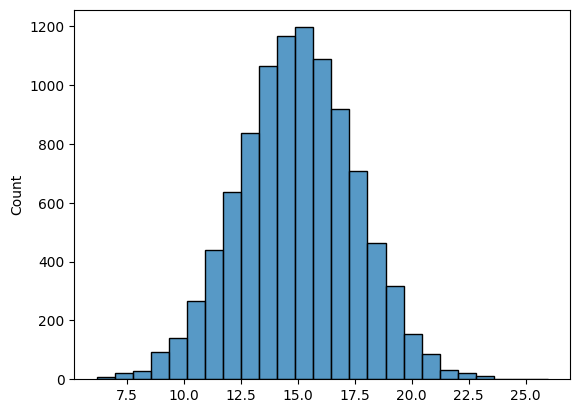

In [5]:
sns.histplot(y, bins=25)

In [6]:
df_hw = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df_hw.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [7]:
columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df = df[columns]

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


In [8]:
df_hw.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [9]:
df_hw.horsepower.median()

np.float64(149.0)

### Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [10]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
df_val.shape, df_test.shape, df_train.shape

((1940, 4), (1940, 4), (5824, 4))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [14]:
mean = df_train['horsepower'].mean()

In [15]:
X_train_fillna_mean = df_train.fillna(mean).values
X_train_fillna_0 = df_train.fillna(0).values

In [16]:
w0, w = train_linear_regression(X_train_fillna_mean, y_train)
y_val_pred_mean = w0 + df_val.fillna(df_train.mean()).values.dot(w)
rmse_val_mean = rmse(y_val, y_val_pred_mean)

w0, w = train_linear_regression(X_train_fillna_0, y_train)
y_val_pred_0 = w0 + df_val.fillna(0).values.dot(w)
rmse_val_0 = rmse(y_val, y_val_pred_0)

print(round(rmse_val_mean,2), round(rmse_val_0,2))

0.46 0.52


Filling with mean is better

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [27]:
X_train = df_train.fillna(0).values
X_val = prepare_X(df_val, fillna_value=0)
r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [28]:

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.5f' % (r, rmse_val))

     0 0.03861
  0.01 0.03863
     1 0.04012
    10 0.04030
   100 0.04032


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [20]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:

results = {}
for seed in seeds:
    n = len(df_hw)
    n_val = int(n * .2)
    n_test = int(n * .2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_hw.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_hw.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_hw.iloc[idx[n_train+n_val:n_train+n_val+n_test]].reset_index(drop=True)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = df_train.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)
    y_val_pred = w0 + df_val.fillna(0).values.dot(w)
    RMSE_val = rmse(y_val, y_val_pred)
    print(f'RMSE val: {RMSE_val}')
    results[seed] = RMSE_val

print('---')
print(f"Standard deviation of RMSEs: {round(np.std(list(results.values())), 3)}")

RMSE val: 0.03801775537087802
RMSE val: 0.0392788533393729
RMSE val: 0.039446530525595505
RMSE val: 0.0387276370388226
RMSE val: 0.03727535850105433
RMSE val: 0.039384388339929154
RMSE val: 0.03890763931346167
RMSE val: 0.038379716269399816
RMSE val: 0.040189869753460644
RMSE val: 0.038607646441269794
---
Standard deviation of RMSEs: 0.001


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [37]:
n = len(df_hw)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_hw.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_hw.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_hw.iloc[idx[n_train+n_val:n_train+n_val+n_test]].reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train = df_train.fillna(0).values

In [44]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = pd.concat([pd.Series(y_train), pd.Series(y_val)]).values
X_full_train = df_full_train.fillna(0).values

In [45]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.001)
y_test_pred = w0 + df_test.fillna(0).values.dot(w)
RMSE_test = rmse(y_test, y_test_pred)
print(f'RMSE test: {RMSE_test}')
results[seed] = RMSE_test

RMSE test: 0.5156261299169602
